In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('gutenberg-dataset-v2.json')

print(len(df))


120162


In [7]:
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)



df.sort_values('date').tail()

df.dtypes

# df['date'].value_counts()[:10].index.tolist()


# df[df['date'] == 1776]

title     object
author    object
date       int64
text      object
dtype: object

In [5]:
df['text_len'] = df['text'].apply(lambda x: len(x.split()))

In [6]:
df

,title,author,date,text_ratio,text,text_len_characters,weights,text_len
273901,"Historical Record of the Thirty-fourth, or the...",Richard Cannon,1702,0.944455,in numbers to three thousand five hundred menr...,12139,0.111111,2000
273902,"Historical Record of the Thirty-fourth, or the...",Richard Cannon,1702,0.944455,joseph bonaparte titular king of spain at tala...,12133,0.111111,2000
129008,The Memorable Thoughts of Socrates,Xenophon,1702,0.963115,in war only to secure their own quiet and choo...,10511,0.047619,2000
273905,"Historical Record of the Thirty-fourth, or the...",Richard Cannon,1702,0.944455,the honorable henry seymour conway appointed t...,11779,0.111111,2000
273899,"Historical Record of the Thirty-fourth, or the...",Richard Cannon,1702,0.944455,improvements were eventually introduced in the...,11914,0.111111,2000
...,...,...,...,...,...,...,...,...
306351,How music grew,Marion Bauer,2023,0.926967,plain song and airs from the cloister and yet ...,10948,0.016667,2000
306335,How music grew,Marion Bauer,2023,0.926967,song and they brought over to britain all thei...,11399,0.016667,2000
306365,How music grew,Marion Bauer,2023,0.926967,writing in that work which is typical of mende...,11409,0.016667,2000
306333,How music grew,Marion Bauer,2023,0.926967,soon the composers made this melody in the med...,10598,0.016667,2000


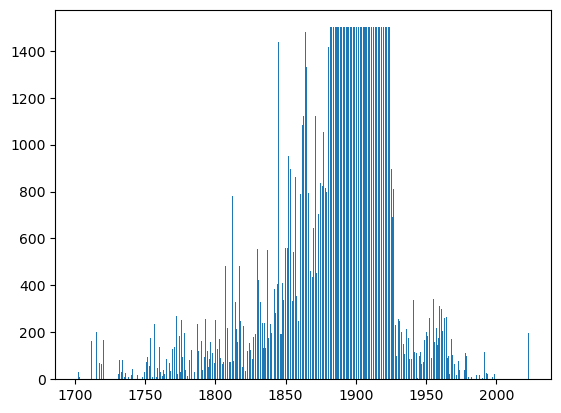

In [9]:
plt.hist(df['date'], bins=500)
plt.show()

In [14]:
def compute_string_length(string):
    return len(str(string))

df['text_len'] = df['text'].apply(compute_string_length)



In [6]:
df = df.sort_values(by='text_ratio')

12510
618


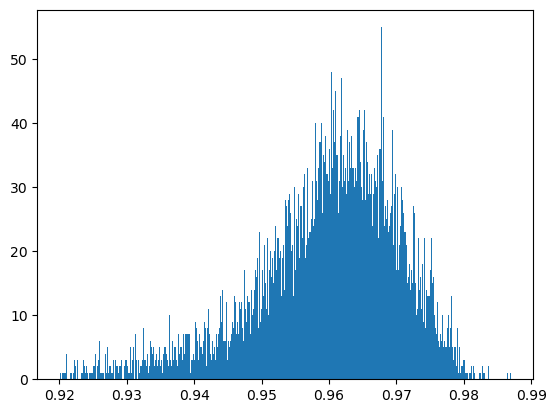

In [15]:
d10 = df[df['text_ratio'] > 0.92]
d9 = df[df['text_ratio'] < 0.92]

print(len(d10))
print(len(d9))

plt.hist(d10['text_ratio'], bins=1000)
plt.show()

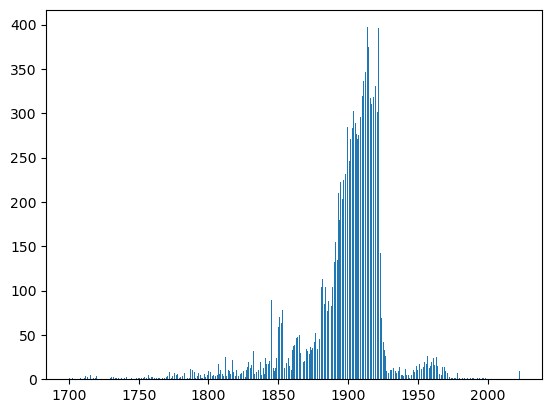

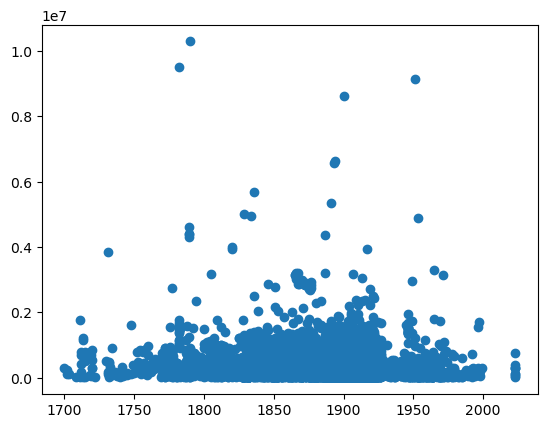

9863


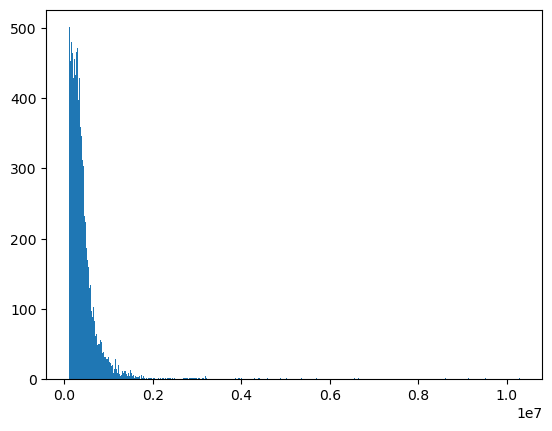

In [31]:
plt.hist(df['date'], bins=500)
# plt.hist(df['date_meta'])
plt.show()

#df = df[df['date'] > 1000]

plt.scatter(df['date'], df['text_len'])
plt.show()

# df2 = df[df['text_len']<2000000]
df2 = df[df['text_len'] > 100000]
print(len(df2))

plt.hist(df2['text_len'], bins=500)
plt.show()

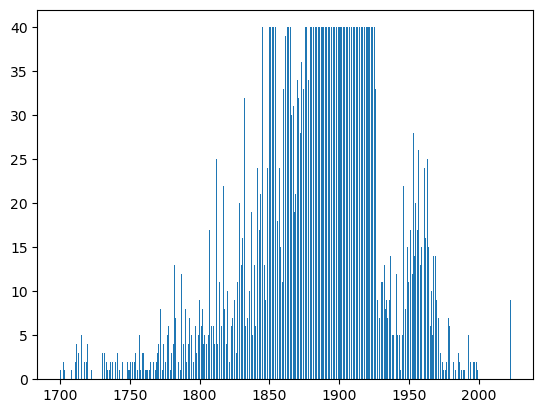

4261


In [38]:
sample_size = 40

# Group by 'Label' and apply a sampling function
sampled_df = df.groupby('date', group_keys=False).apply(lambda group: group.sample(min(len(group), sample_size)))

# Display the sampled DataFrame
plt.hist(sampled_df['date'], bins=500)
plt.show()
print(len(sampled_df))

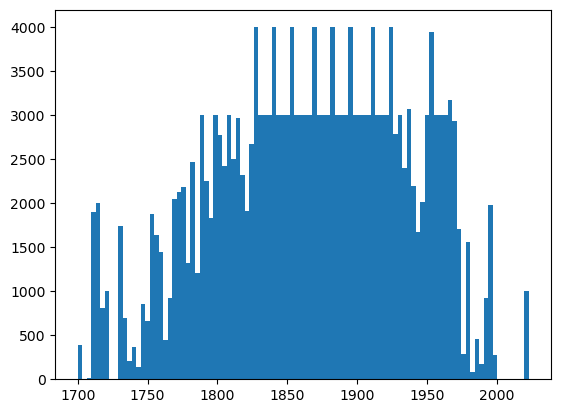

207828


In [46]:
# Function to split text into chunks
def split_text_into_chunks(text, chunk_size):
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

# Specify the desired chunk size
chunk_size = 2000
sample_size = 1000





df_chunks = df
# Apply the function to create chunks and duplicate the 'label' for each chunk
df_chunks['text_chunks'] = df.apply(lambda row: split_text_into_chunks(row['text'], chunk_size), axis=1)
df_chunks = df_chunks.explode('text_chunks')
df_chunks = df_chunks.reset_index(drop=True)


# Group by 'Label' and apply a sampling function
df_chunks = df_chunks.groupby('date', group_keys=False).apply(lambda group: group.sample(min(len(group), sample_size)))

# Display the sampled DataFrame
plt.hist(df_chunks['date'], bins=100)
plt.show()
print(len(df_chunks))


# Display the resulting DataFrame


In [48]:
df_chunks.head(1)

title                   author  date  \
517085  Caudebec in America / A Record of the Descendants of Jacques Caudebec 1700 to 1920  William Louis Cuddeback  1700   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          